<a href="https://colab.research.google.com/github/sandeepkhcltech/aiml/blob/main/multi_layer_perceptron_pima_indians_withGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy


# Below function is used for generating the graph

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_mlp(input_neurons, hidden_layers, output_neurons):
    """
    Draws a Multi-Layer Perceptron diagram.
    Parameters:
    - input_neurons: int, number of input neurons
    - hidden_layers: list of int, number of neurons in each hidden layer
    - output_neurons: int, number of output neurons
    """
    layers = {'Input': [f'X{i+1}' for i in range(input_neurons)]}
    for i, count in enumerate(hidden_layers):
        layers[f'Hidden{i+1}'] = [f'H{i+1}_{j+1}' for j in range(count)]
    layers['Output'] = [f'Y{i+1}' for i in range(output_neurons)]

    G = nx.DiGraph()
    positions = {}
    x_offset = 0
    for layer_name, neurons in layers.items():
        y_offset = len(neurons)
        for i, neuron in enumerate(neurons):
            G.add_node(neuron)
            positions[neuron] = (x_offset, y_offset - i)
        x_offset += 1

    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        for src in layers[layer_names[i]]:
            for dst in layers[layer_names[i + 1]]:
                G.add_edge(src, dst)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos=positions, with_labels=True, node_size=1000, node_color='skyblue', font_size=8, arrows=False)
    plt.title("Multi-Layer Perceptron (MLP) Architecture")
    plt.axis('off')
    plt.show()

# Example usage
#draw_mlp(input_neurons=8, hidden_layers=[12, 8], output_neurons=1)

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("https://raw.githubusercontent.com/enuguru/GenAI/refs/heads/main/neural-networks/ann/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [9]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

# Draw the MLP architecture nx.graph

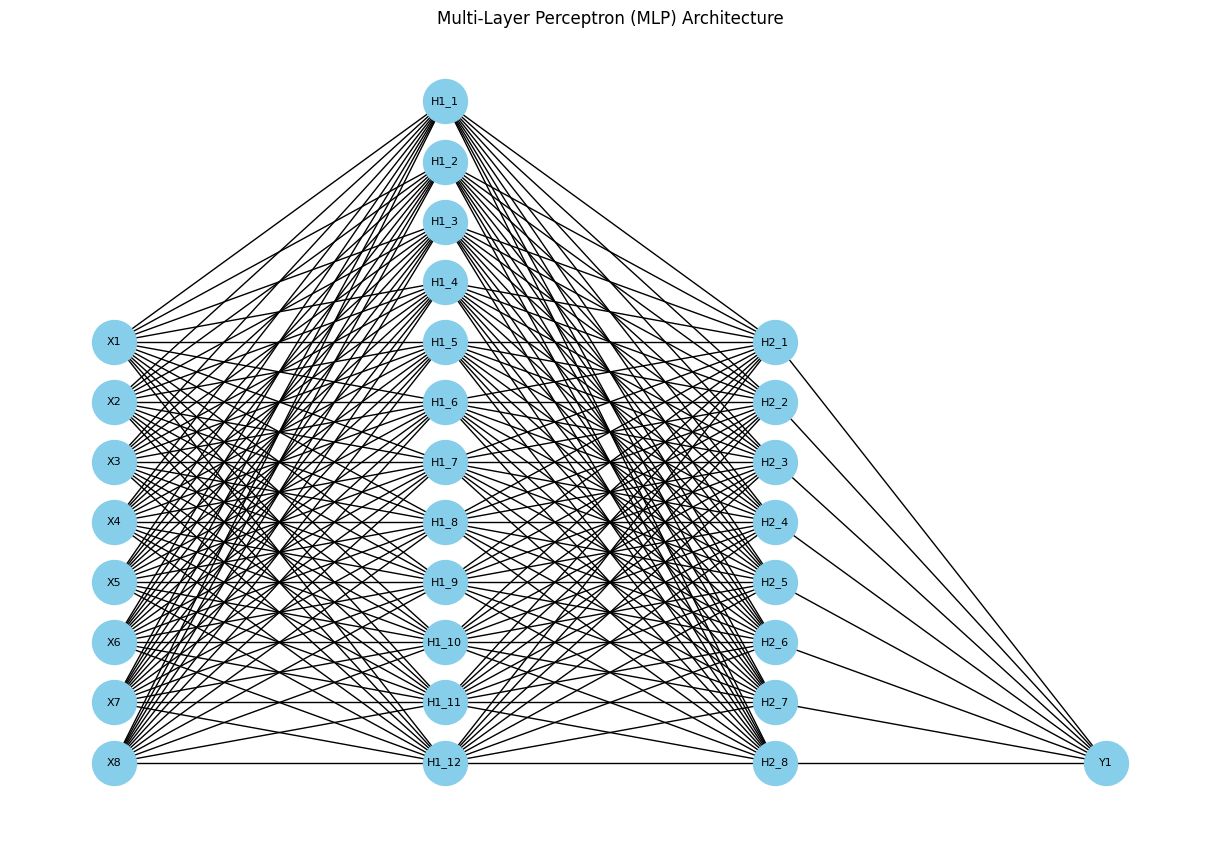

In [8]:

draw_mlp(input_neurons=8, hidden_layers=[12, 8], output_neurons=1)

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5409 - loss: 4.1835
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5140 - loss: 1.2604
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5444 - loss: 1.0364
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5308 - loss: 0.8638
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 0.7371
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5903 - loss: 0.7138
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5913 - loss: 0.7255
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5993 - loss: 0.7041
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6213 - loss: 0.6790
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6595 - loss: 0.6923
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.6315
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [6]:
import numpy as np
# Predict diabetes for new samples (3 new patients)
samples = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],   # Sample 1
                    [1, 85, 66, 29, 0, 26.6, 0.351, 31],    # Sample 2
                    [8, 183, 64, 0, 0, 23.3, 0.672, 32]])   # Sample 3

# Standardize the new data using the same scaler
#samples_scaled = scaler.transform(samples)

In [7]:
# Predict diabetes (returns probabilities)
predictions = model.predict(samples)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Output predictions
print("Predictions for the samples (0 = No Diabetes, 1 = Diabetes):")
print(predicted_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predictions for the samples (0 = No Diabetes, 1 = Diabetes):
[0 0 1]
